# Leaf Disease Detection Program using CNN with Keras API

# Execution Phase

(1) 사용할 패키지 불러오기

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator

(2) 예측할 데이터 생성하기

In [33]:
new_datagen = ImageDataGenerator(rescale = 1./255)

new_generator = new_datagen.flow_from_directory('rawDataA/new',
                                                  target_size = (32,32),
                                                  batch_size = 3,
                                                  class_mode = 'categorical')

Found 2 images belonging to 4 classes.


(3) 저장된 학습 모델 및 가중치 불러오기

In [34]:
from keras.models import model_from_json

# Model reconstruction from JSON file
with open('model_architectureA.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('leaf_diseaseA.h5')

(4) 예측할 데이터 보이기

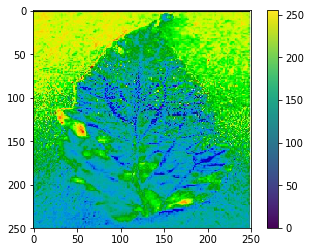

In [35]:
# Put the image data any folder(label) you want.
img=mpimg.imread ('rawDataA/new/mildew/0a555f63-bf03-4958-8993-e1932b8dce9f___Crnl_L.Mold 9064.jpg')
img.shape
imgplot = plt.imshow(img)
plt.colorbar()

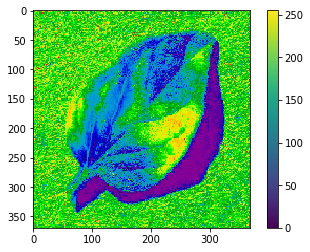

In [36]:
img2=mpimg.imread ('rawDataA/new/mold/0a9b3ff4-5343-4814-ac2c-fdb3613d4e4d___Crnl_L.Mold 6559.jpg')
img.shape
imgplot = plt.imshow(img2)
plt.colorbar()

(5) 병 예측하기

In [37]:
print("-- Predict --")
output = model.predict_generator(new_generator, steps=1)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(new_generator.class_indices)
print(output) # It doesn't matter with the result which folder you put the new data.

-- Predict --
{'mildew': 0, 'mold': 1, 'mosaic': 2, 'rust': 3}
[[0.060 0.835 0.088 0.018]
 [0.236 0.329 0.351 0.085]]
